In [1]:
import cmath 
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

class Runge_Kutta_4(ABC):
    def __init__(self, function=None, initial_y=None, discretization=0.01, interval=1., is_function_depends_on_x=False, num_objects=1):
        """
        :param function: np.array, матрица ДУ
        :param discretization: float, шаг интегрирования
        :param interval: float, интервал интегрирования
        :param initial_y: np.array, начальные условия
        """
        self.function = function if function is not None else []
        self.discretization = discretization
        self.interval = interval
        self.initial_y = initial_y if initial_y is not None else []
        self.is_function_depends_on_x = is_function_depends_on_x
        self.computations_complited = False
        self.num_objects = num_objects
        
    @abstractmethod
    def get_function(self, x, num, y):
        """
        :param x: float, координата x
        """
        pass
    
    @abstractmethod
    def save_y(self, y):
        pass
    
    @abstractmethod
    def load_y(self):
        pass
    
    def get_derivative(self, function, y):
        """
        :param function: np.array, функция ДУ
        :param psi: np.array, значение вектора y
        """
        return function @ y
    
    def run(self):
        
        N = int(self.interval / self.discretization) + 1
        y = [self.initial_y for _ in range(N)]
        y[0] = self.initial_y
        x_range = [i * self.discretization for i in range(N)]
        h = self.discretization
        y_new = [[] for _ in range(self.num_objects)]

        for n in range(N - 1):
            x_n = x_range[n]
            for obj in range(self.num_objects):
                if self.is_function_depends_on_x:
                    function_n = self.get_function(x_n, obj, y[n])
                    function_n_half_h = self.get_function(x_n + h / 2, obj, y[n])
                    function_n_h = self.get_function(x_n + h, obj, y[n])
                else:
                    function_n = self.function
                    function_n_half_h = self.function
                    function_n_h = self.function
                k_1 = self.get_derivative(function_n, y[n][:][obj]) 
                k_2 = self.get_derivative(function_n_half_h, y[n][:][obj] + k_1 * h / 2)
                k_3 = self.get_derivative(function_n_half_h, y[n][:][obj] + k_2 * h / 2)
                k_4 = self.get_derivative(function_n_h, y[n][:][obj] + k_3 * h)
                new = y[n][obj] + h / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
                y[n][obj] = new
                y_new[obj].append(new)
#                     print(y[n + 1][obj])
                
#         print(y_1)
        self.computations_complited = True
        y = np.array(y_new)
#         self.save_y(y)
    
        return y
    
class Shredinger_equation(Runge_Kutta_4):
    def __init__(self, hamiltonian=None, is_hamiltonian_depends_on_t=False, h_pi=1):
        """
        :param hamiltonian: np.array, Гамильтониан системы
        :param h_pi: float, постоянная Планка, деленная на 2pi
        """
        super().__init__()
        self.is_function_depends_on_x = is_hamiltonian_depends_on_t
        self.hamiltonian = hamiltonian if hamiltonian is not None else []
        self.h_pi = h_pi
        self.function = - complex(0, 1) / self.h_pi * self.hamiltonian
        
    def get_function(self, x):
        """
        :param x: float, координата x
        """
        pass
    
    def save_y(self, y):
        """
        :param y: np.array, вектор-функция
        """
        np.savetxt(f'{self.initial_y}_Shredinger_equation_Runge_Kutta_4.txt', y.view(float))
        return y
    
    def load_y(self):
        y = np.loadtxt(f'{self.initial_y}_Shredinger_equation_Runge_Kutta_4.txt').view(complex)
        return y
    
    def draw_psi_plot(self):
        if not self.computations_complited:
            raise
        plt.figure(figsize=(10, 8))
        legend = []
        colors = ['purple', 'b', 'dodgerblue', 'k', 'grey', 'r']
        psi = self.load_y()
        t = [i * self.discretization for i in range(len(psi))]
        for num_dim in range(len(self.initial_y)):
            plt.plot(t, psi[:, num_dim].real, marker ='o', c = colors[num_dim])
            legend.append(f'psi_{num_dim}_real')
            
            plt.plot(t, psi[:, num_dim].imag, marker ='.', c = colors[num_dim])
            legend.append(f'psi_{num_dim}_imag')



        plt.legend(legend, loc="lower right", fontsize=15)
        plt.grid()
        plt.show()
        
        return plt
        
    def get_aver_operator(self, operator):
        """
        :param operator: np.array, оператор, для которого считаем среднее
        """
        if not self.computations_complited:
            raise

        psi = self.load_y()
        aver = [np.conj(psi[i]) @ operator @ psi[i] for i in range(len(psi))]
        
        return np.array(aver)
    
    def get_sum_of_abs(self):
        psi = self.load_y()
        up = np.abs(psi[:, 0])
        down = np.abs(psi[:, 1])
        return up * up + down * down
          
        
class Shredinger_Eq_H_t(Runge_Kutta_4):
    def __init__(self, h=0.01, H=1, w=-1.):
        super().__init__()
        self.h = h 
        self.H = H
        self.w = w 
        
    def get_function(self, x):
        """
        :param x: float, координата x
        """
        return -complex(0, 1) * np.array([[self.H, self.h * np.exp(complex(0, 1) * self.w * x)],
                         [self.h * np.exp( -complex(0, 1) * self.w * x), -self.H]])
    
    
    def save_y(self, y):
        pass

    def load_y(self):
        pass
    
    
class L_Eq(Runge_Kutta_4):
    def __init__(self):
        super().__init__()
        
    def get_function(self, x):
        """
        :param x: float, координата x
        """
        pass
    
    def save_y(self, y):
        pass

    def load_y(self):
        pass

In [2]:
def inversal_method(border, slope, z):
    return (-1 + np.sqrt(1 + 4 * z * slope * border)) / (2 * slope)

def generate_linear_distr(border, slope, num_conditions):
    left = ((1 - 2 * slope * border)**2 - 1) / (4 * border * slope)
    right = ((1 + 2 * slope * border)**2 - 1) / (4 * border * slope)
    uni = np.random.uniform(left, right, num_conditions)
    linear = []
    for z_uni in uni:
        linear.append(inversal_method(border, slope, z_uni))
    return linear

def generate_initial_conditions(s_0, slope_s_0, num_conditions):
    s_0_x = np.array(generate_linear_distr(s_0, slope_s_0, num_conditions))
    phi = np.random.uniform(0, 2 * np.pi, num_conditions)
    s_0_y = np.sqrt(s_0**2 - s_0_x**2) * np.cos(phi)
    s_0_z = np.sqrt(s_0**2 - s_0_x**2) * np.sin(phi)
    return s_0_x, s_0_y, s_0_z, phi

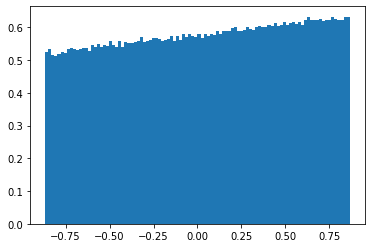

In [3]:
s = np.sqrt(3) / 2
slope = 1 / s / 20
st = generate_linear_distr(s, slope, 1000000)
count, bins, ignored = plt.hist(st, 100, density=True)
plt.show()

In [4]:
class Shredinger_two_spins_full(Runge_Kutta_4):
    def __init__(self, H=10, J_y=1, J_z=1, S_neigh_y=0, S_neigh_z=0):
        super().__init__()
        self.H = H
        self.J_y = J_y
        self.J_z = J_z
        
    def get_function(self, x, num, y):
        """
        :param x: float, координата x
        """
        neigh = (num - 1) ** 2
        S_neigh_x, S_neigh_y, S_neigh_z = y[neigh][0], y[neigh][1], y[neigh][2]
        return np.array([[0, self.H - self.J_z * S_neigh_z, self.J_y * S_neigh_y],
                        [-self.H + self.J_z * S_neigh_z, 0, 0],
                        [-self.J_y * S_neigh_y, 0, 0]])
    
    
    def save_y(self, y):
        pass

    def load_y(self):
        pass
    
    
class Shredinger_two_spins_trunc(Runge_Kutta_4):
    def __init__(self, H=10, J_x=1, J_y=1, J_z=1, S_neigh_y=0, S_neigh_z=0):
        super().__init__()
        self.H = H
        self.J_x = J_x
        self.J_y = J_y
        self.J_z = J_z
        
    def get_function(self, x, num, y):
        """
        :param x: float, координата x
        """
        neigh = (num - 1) ** 2
        S_neigh_x, S_neigh_y, S_neigh_z = y[neigh][0], y[neigh][1], y[neigh][2]
        return np.array([[0, self.H - self.J_z * S_neigh_z, self.J_y / 2 * S_neigh_y],
                        [-self.H + self.J_z * S_neigh_z, 0, - self.J_y / 2 * S_neigh_x],
                        [-self.J_y / 2 * S_neigh_y, self.J_y / 2 * S_neigh_x, 0]])
    
    
    def save_y(self, y):
        pass

    def load_y(self):
        pass

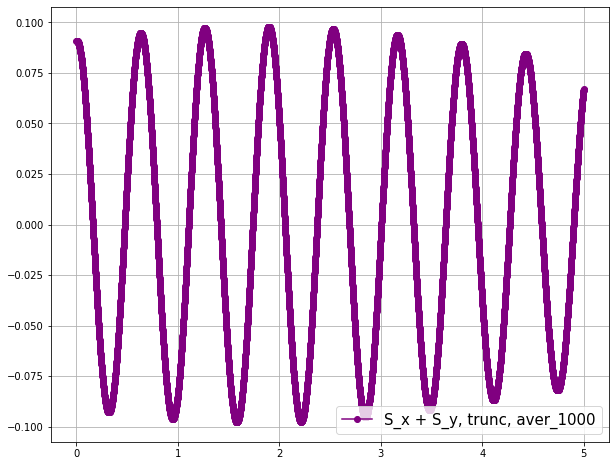

In [6]:
# from tqdm import tqdm
s = np.sqrt(3) / 2
slope = 1 / s / 20
num_conditions = 1000
s_0_x, s_0_y, s_0_z, phi = generate_initial_conditions(s, slope, num_conditions)
s_1_x, s_1_y, s_1_z, phi = generate_initial_conditions(s, slope, num_conditions)

summa_x = []

for state in range(num_conditions):
    Problem = Shredinger_two_spins_trunc()
    Problem.initial_y = np.array([[s_0_x[state], s_0_y[state], s_0_z[state]],[s_1_x[state], s_1_y[state], s_1_z[state]]])
    Problem.discretization = 0.001
    Problem.interval = 5
    Problem.is_function_depends_on_x = True
#     print(Problem.initial_y)
    Problem.num_objects = 2
    ans = Problem.run()
    summa_x.append(ans[0][:, 0] + ans[1][:, 0])
    
plt.figure(figsize=(10, 8))
legend = []
colors = ['purple', 'b', 'dodgerblue', 'k', 'grey', 'r']
t = [i * Problem.discretization for i in range(len(ans[0]))]

aver_sum = np.mean(np.array(summa_x), axis=0)


plt.plot(t, aver_sum, marker ='o', c = colors[0])
legend.append(f'S_x + S_y, trunc, aver_{len(summa_x)}')

plt.legend(legend, loc="lower right", fontsize=15)
plt.grid()
# plt.show()
plt.savefig(f'trunc_aver_{len(summa_x)}.png')

In [ ]:
s = np.sqrt(3) / 2
slope = 1 / s / 20
num_conditions = 10000
s_0_x, s_0_y, s_0_z, phi = generate_initial_conditions(s, slope, num_conditions)
s_1_x, s_1_y, s_1_z, phi = generate_initial_conditions(s, slope, num_conditions)

summa_x = []

for state in range(num_conditions):
    Problem = Shredinger_two_spins_full()
    Problem.initial_y = np.array([[s_0_x[state], s_0_y[state], s_0_z[state]],[s_1_x[state], s_1_y[state], s_1_z[state]]])
    Problem.discretization = 0.001
    Problem.interval = 5
    Problem.is_function_depends_on_x = True
#     print(Problem.initial_y)
    Problem.num_objects = 2
    ans = Problem.run()
    summa_x.append(ans[0][:, 0] + ans[1][:, 0])
    
plt.figure(figsize=(10, 8))
legend = []
colors = ['purple', 'b', 'dodgerblue', 'k', 'grey', 'r']
t = [i * Problem.discretization for i in range(len(ans[0]))]

aver_sum = np.mean(np.array(summa_x), axis=0)

plt.plot(t, aver_sum, marker ='o', c = colors[0])
legend.append(f'S_x + S_y, full, aver_{len(summa_x)}')

plt.legend(legend, loc="lower right", fontsize=15)
plt.grid()
plt.show()
# plt.savefig(f'full_aver_{len(summa_x)}.png')

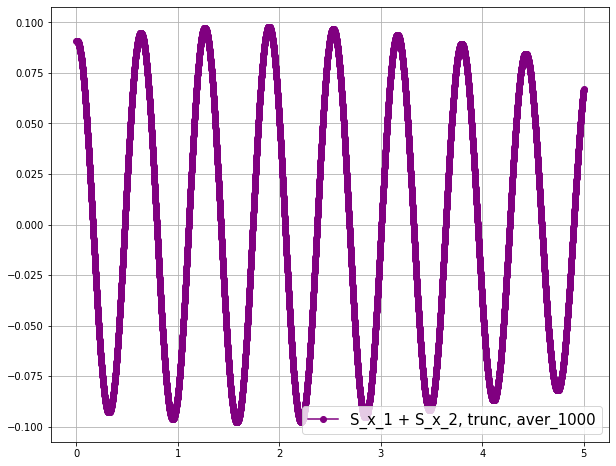

In [7]:
plt.figure(figsize=(10, 8))
legend = []
colors = ['purple', 'b', 'dodgerblue', 'k', 'grey', 'r']
t = [i * Problem.discretization for i in range(len(ans[0]))]

aver_sum = np.mean(np.array(summa_x), axis=0)


plt.plot(t, aver_sum, marker ='o', c = colors[0])
legend.append(f'S_x_1 + S_x_2, trunc, aver_{len(summa_x)}')

plt.legend(legend, loc="lower right", fontsize=15)
plt.grid()
# plt.show()
plt.savefig(f'trunc_aver_{len(summa_x)}.png')